In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
import statistics


In [2]:
def theoretical(n, p):

    avg_degree = p * (n - 1)
    avg_clustering = p
    
    if avg_degree > 1:
        avg_path_length = np.log(n) / np.log(avg_degree)
    else:
        avg_path_length = float('inf')  
    
    return avg_degree, avg_clustering, avg_path_length


In [3]:
def APL(G):
    if nx.is_connected(G):
        return nx.average_shortest_path_length(G)
    else:
        largest_cc = max(nx.connected_components(G), key=len)
        G_lcc = G.subgraph(largest_cc).copy()
        return nx.average_shortest_path_length(G_lcc)

In [4]:
def ER(n, p, num_runs):
    degrees_list = []
    clustering_list = []
    path_length_list = []

    for i in range(num_runs):
        G = nx.erdos_renyi_graph(n, p)
        
        # Average degree
        degrees = [deg for j, deg in G.degree()]
        degrees_list.append(np.mean(degrees))

        # Clustering
        clustering_list.append(nx.average_clustering(G))

        # Path length (largest component)
        path_length_list.append(APL(G))

    return {
        "avg_degree": statistics.mean(degrees_list),
        "avg_clustering": statistics.mean(clustering_list),
        "avg_path_length": statistics.mean(path_length_list)
    }


In [5]:
def plot(G, title=""):
    # Collect degrees
    degrees = [deg for k, deg in G.degree()]
    if len(degrees) == 0:
        print("Graph has no nodes or edges!")
        return
    
    # Calculate actual mean
    actual_mean = np.mean(degrees)
    
    # Bin the degrees (bincount) to get probability distribution
    degree_counts = np.bincount(degrees)
    total_nodes = sum(degree_counts)
    degree_prob = degree_counts / total_nodes  # Probability for each degree
    
    # x-values for plotting
    x_vals = np.arange(len(degree_prob))
    
    # Poisson PMF with mean = actual_mean
    from scipy.stats import poisson
    poisson_vals = poisson.pmf(x_vals, mu=actual_mean)

    # Plot the actual distribution as a line
    plt.figure(figsize=(6,4))
    plt.plot(x_vals, degree_prob, 'bo-', label='Actual Dist')

    # Plot the Poisson curve
    plt.plot(x_vals, poisson_vals, 'r--', label='Poisson Fit')

    # Vertical line at the actual mean
    plt.axvline(actual_mean, color='g', linestyle='dashed',
                label=f'Mean = {actual_mean:.2f}')

    # Final labeling
    plt.title(title)
    plt.xlabel("Degree")
    plt.ylabel("Probability")
    plt.legend()
    plt.show()



Running experiments for (n=1000, p=0.01) with 30 runs...
  Actual Avg Degree:     10.0244   | Theoretical: 9.9900
  Actual Clustering:     0.0100 | Theoretical: 0.01
  Actual Avg Path Len:   3.2537 | Theory ~ 3.0013


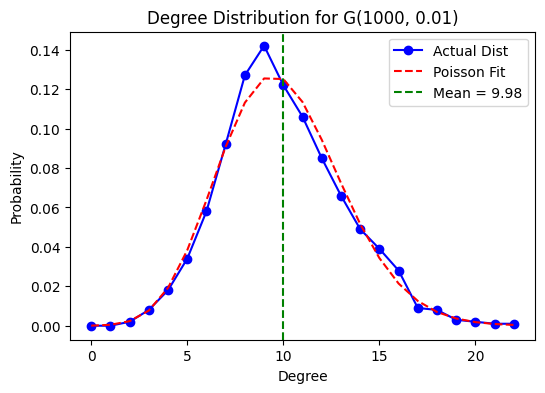


Running experiments for (n=3000, p=0.005) with 30 runs...
  Actual Avg Degree:     14.9552   | Theoretical: 14.9950
  Actual Clustering:     0.0050 | Theoretical: 0.005
  Actual Avg Path Len:   3.2486 | Theory ~ 2.9569


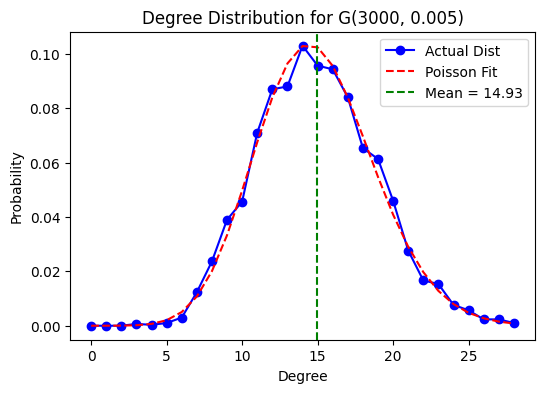


Running experiments for (n=5000, p=0.0025) with 30 runs...
  Actual Avg Degree:     12.5019   | Theoretical: 12.4975
  Actual Clustering:     0.0025 | Theoretical: 0.0025
  Actual Avg Path Len:   3.6516 | Theory ~ 3.3724


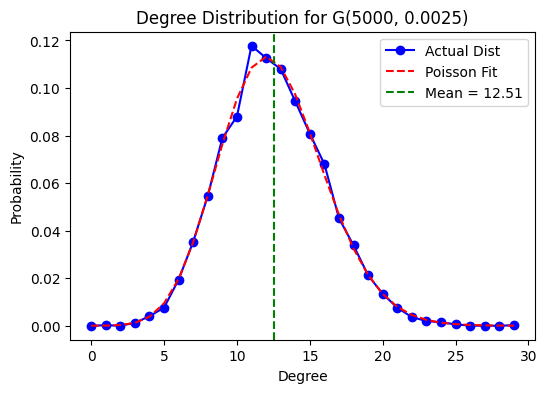

In [6]:
# Small-scale (n, p) configurations
configs = [
    (1000, 0.01),   # Small-ish network 
    (3000, 0.005),  # Mid-size
    (5000, 0.0025)  # Larger network
]

num_runs = 30  # Number of runs per (n, p) to average over

for (n, p) in configs:
    print(f"\nRunning experiments for (n={n}, p={p}) with {num_runs} runs...")
    
    # Run multiple simulations and average the metrics
    results = ER(n, p, num_runs=num_runs)
    
    # Theoretical values
    theor_deg, theor_clust, theor_path = theoretical(n, p)
    
    # Print out Actual vs theoretical
    print(f"  Actual Avg Degree:     {results['avg_degree']:.4f}   | Theoretical: {theor_deg:.4f}")
    print(f"  Actual Clustering:     {results['avg_clustering']:.4f} | Theoretical: {p}")
    print(f"  Actual Avg Path Len:   {results['avg_path_length']:.4f} | Theory ~ {theor_path:.4f}")
    
    # Plot degree distribution for one sample graph
    G_sample = nx.erdos_renyi_graph(n, p)
    plot(G_sample, title=f"Degree Distribution for G({n}, {p})")
